<h1 align="center">Zewail City of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2020) </h2>
<h2 align="center">Lab 3: Linear Regression </h2>
<h3 align="center">Prepared by: Aya Elzahy</h3>

#First: Linear Regression using the normal equation

  $\vartheta =(X^TX)^{-1} X^Tt$ 


  > 
  $\vartheta$: Weight (coefficient) vector

  $X$: feature matrix where the first column is a column of ones representing the added bias and each other column represents the values of a certain feature.


Let’s generate some linear-looking data to test the normal equation

In [ ]:
import numpy as np
num_points= 100 
x1 = 2* np.random.rand(num_points, 1) #Create an array of the shape 100x1 and populate it with random samples from a uniform distribution over [0, 1)
gaussian_noise= np.random.randn(num_points, 1) #sampled from a normal (Gaussian) distribution of mean 0 and variance 1
theta0= 4
theta1= 3
t = theta0 + theta1 * x1 + gaussian_noise

In [ ]:
x0= np.ones((num_points, 1))
X = np.c_[x0, x1] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(t)

In [ ]:
x0.shape

(100, 1)

In [ ]:
X[0:5]

array([[1.        , 0.01806922],
       [1.        , 1.86392581],
       [1.        , 0.06726592],
       [1.        , 1.80374747],
       [1.        , 1.58522717]])

In [ ]:
theta_best

array([[4.12407194],
       [2.78074985]])

Acceptable approximation to θ_0 and θ_1, but the noise made it impossible to recover the exact parameters of the original
function. 

Now you can make predictions using θ

In [ ]:
X1_new = np.array([[0], [2]])
X_new = np.c_[np.ones((2, 1)), X1_new] # add x0 = 1 to each instance
y_predict = X_new.dot(theta_best)
y_predict

array([[4.12407194],
       [9.68557163]])

Let’s plot this model’s predictions

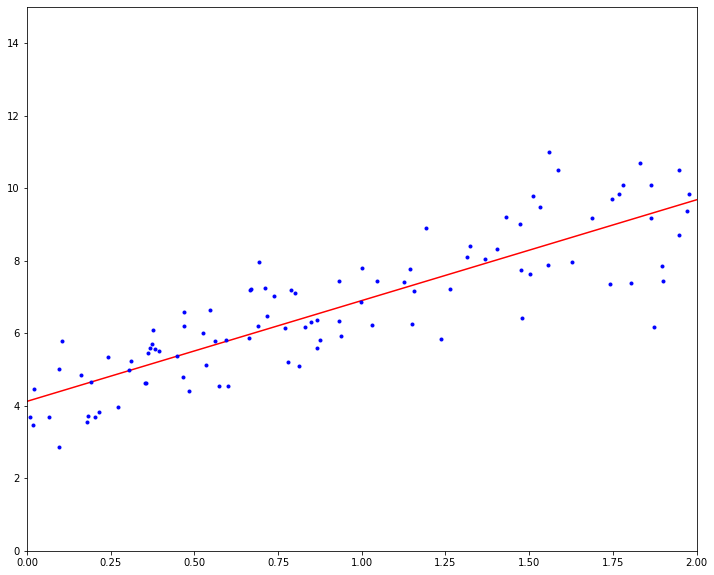

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

plt.plot(X1_new, y_predict, "r-")
plt.plot(x1, t, "b.")
plt.axis([0, 2, 0, 15]) #x axis range 0 to 2 and y axis range 0 to 15
plt.show()

#Second: linear regression using Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x1, t)
lin_reg.intercept_, lin_reg.coef_

(array([4.12407194]), array([[2.78074985]]))

In [ ]:
lin_reg.predict(X1_new)

array([[4.12407194],
       [9.68557163]])

#Third: Linear regression using gradient descent


#Task 1 [2 points] 

Implement batch gradient descent and get the values of theta using your implementation. 

$\vartheta= \vartheta - (2\lambda/n)X^T(y-t)$

where n is the number of examples (data points). 

In [ ]:
#Your code here
theta = np.random.randn(2,1)          # random initialization of model parameters

#Fourth: Linear Regression using SGD with Scikit-Learn

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x1, t.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.08256712]), array([2.74386527]))

#Fifth: Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

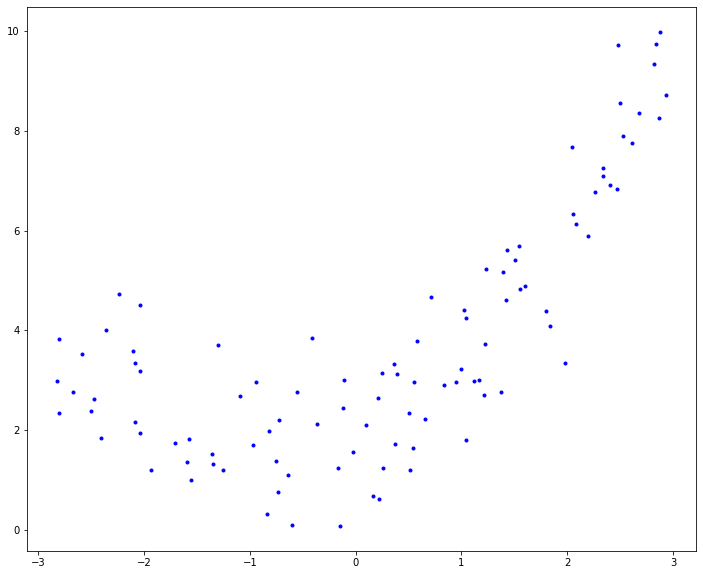

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
t = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, t, "b.")


Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
print('X[0]= ', X[0])
print('X_poly[0]= ', X_poly[0])

X[0]=  [2.87015592]
X_poly[0]=  [2.87015592 8.23779503]


X_poly now contains the original feature of X plus the square of this feature. 

Now you can fit a LinearRegression model to this extended training data

Intercept=  [1.96120138] and coefficients =  [[0.90699846 0.55054175]]
Root mean squared error=  0.9852365658218143


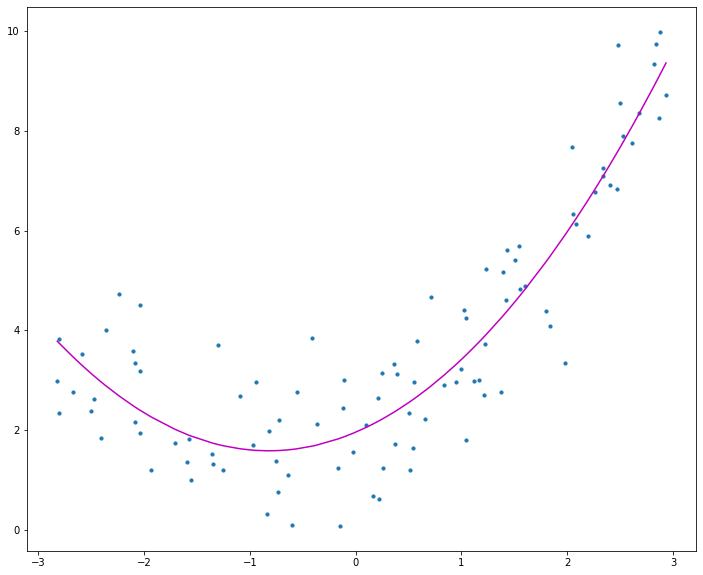

In [ ]:
from sklearn.metrics import mean_squared_error
import operator

lin_reg = LinearRegression()
lin_reg.fit(X_poly, t) #Fit the transformed features 
y_poly_pred = lin_reg.predict(X_poly)  #Letting the model predict the y values for the transformed features to measure the error
rmse = np.sqrt(mean_squared_error(t,y_poly_pred)) 
print("Intercept= ", lin_reg.intercept_,"and coefficients = " ,lin_reg.coef_)
print("Root mean squared error= ", rmse)


#Plot 
plt.scatter(X, t, s=10) 
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
X_plot, y_poly_pred_plot = zip(*sorted_zip)
plt.plot(X_plot, y_poly_pred_plot, color='m')
plt.show()

Not bad: The original
function was y = 0.5 x^2 + 1.0 x + 2.0 + Gaussian noise.

In [ ]:
def poly_reg (X, t, power, i, X_test, t_test):
  poly_features = PolynomialFeatures(degree=power, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, t) #Fit the transformed features 
  y_poly_pred = lin_reg.predict(X_poly)  #Letting the model predict the y values for the transformed features to measure the error
  rmse = np.sqrt(mean_squared_error(t,y_poly_pred)) 

  #evaluate test data 
  X_poly_test = poly_features.fit_transform(X_test) #Must apply the same transformations to train and test
  y_poly_eval= lin_reg.predict(X_poly_test)
  rmse_test = np.sqrt(mean_squared_error(t_test,y_poly_eval)) 

  #Plot 
  axs[i].scatter(X, t, s=10) 
  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
  X_plot, y_poly_pred_plot = zip(*sorted_zip)
  axs[i].plot(X_plot, y_poly_pred_plot, color='m')
  axs[i].set_title('Polynomial of degree: %d'%power)
  return lin_reg.intercept_, lin_reg.coef_.tolist()[0], rmse, rmse_test

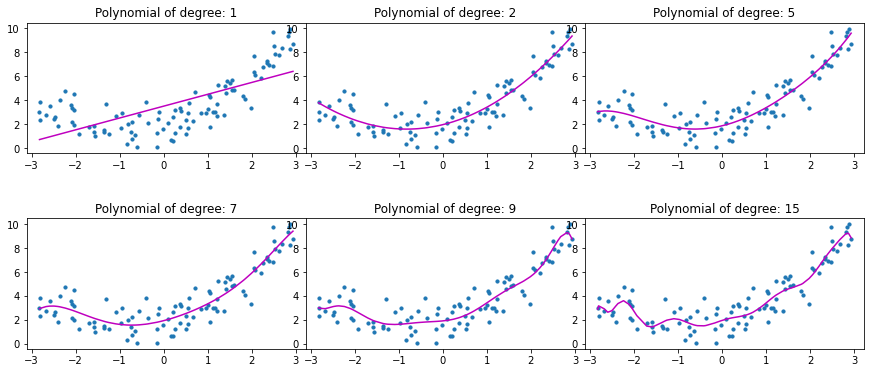

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

m = 20
X_test = 10*np.random.rand(m, 1)-4
t_test = 0.5 * X_test**2 + X_test + 2 + np.random.randn(m, 1)


coeff= {}
rmse= {}
rmse_test={}
powers= [1,2,5,7,9,15]
for i in range (len(powers)):
  power= powers[i]
  intercept,coeff[power],rmse[power], rmse_test[power]= poly_reg (X, t, power, i, X_test, t_test)


In [ ]:
rmse

{1: 1.7465142747725635,
 2: 0.9852365658218143,
 5: 0.9683300823782324,
 7: 0.9657161430216328,
 9: 0.9502718744556429,
 15: 0.9289228815987699}

In [ ]:
rmse_test

{1: 6.014571753950882,
 2: 1.2912148644033232,
 5: 11.605805539636645,
 7: 59.228192067227226,
 9: 5469.758305329825,
 15: 367781.02182982856}

In [ ]:
import pandas as pd
coeff_lin_df= pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in coeff.items()]))
coeff_lin_df

,1,2,5,7,9,15
0,0.989717,0.906998,0.884095,0.955321,0.372474,1.202681
1,NaN,0.550542,0.693013,0.507918,0.670830,-0.964052
2,NaN,NaN,-0.056229,-0.115448,0.892082,-1.787215
3,NaN,NaN,-0.020969,0.042901,-0.078596,4.249475
4,NaN,NaN,0.009902,0.022471,-0.440154,1.827669
5,NaN,NaN,NaN,-0.005391,0.019290,-3.658726
6,NaN,NaN,NaN,-0.000755,0.076888,-0.640541
7,NaN,NaN,NaN,NaN,-0.001457,1.393199
8,NaN,NaN,NaN,NaN,-0.004297,0.062584
9,NaN,NaN,NaN,NaN,NaN,-0.263053


#Sixth: Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
def ridge_reg (X, t, power, alpha, i, X_test, t_test):
  poly_features = PolynomialFeatures(degree=power, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  ridge_reg = Ridge(alpha=alpha)
  ridge_reg.fit(X_poly, t) #Fit the transformed features 
  y_ridge_pred = ridge_reg.predict(X_poly)  #Letting the model predict the y values for the transformed features to measure the error
  rmse = np.sqrt(mean_squared_error(t,y_ridge_pred)) 

  #evaluate test data 
  X_ridge_test = poly_features.fit_transform(X_test) #Must apply the same transformations to train and test
  y_ridge_eval= ridge_reg.predict(X_ridge_test)
  rmse_test = np.sqrt(mean_squared_error(t_test,y_ridge_eval)) 


  #Plot 
  axs[i].scatter(X, t, s=10) 
  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(X,y_ridge_pred), key=sort_axis)
  X_plot, y_ridge_pred_plot = zip(*sorted_zip)
  axs[i].plot(X_plot, y_ridge_pred_plot, color='m')
  axs[i].set_title('alpha= : %.3f'%alpha)
  return ridge_reg.intercept_, ridge_reg.coef_.tolist()[0], rmse, rmse_test

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.09554e-17): result may not be accurate.
  overwrite_a=True).T


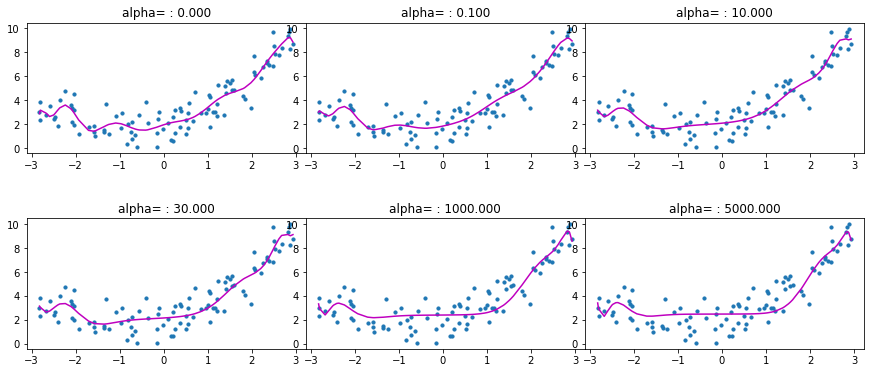

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

m = 20
X_test = 3*np.random.rand(m, 1)+1
t_test = 0.5 * X_test**2 + X_test + 2 + np.random.randn(m, 1)

coeff_ridge= {}
rmse_ridge= {}
rmse_ridge_test= {}
power= 15
alphas= [0,0.1,10,30, 1000, 5000]
for i in range (len(alphas)):
  alpha= alphas[i]
  intercept_ridge,coeff_ridge[alpha],rmse_ridge[alpha],rmse_ridge_test[alpha]= ridge_reg (X, t, power,alpha, i, X_test, t_test)


In [ ]:
rmse_ridge

{0: 0.9289228815987222,
 0.1: 0.9334396984683355,
 10: 0.9539418395682371,
 30: 0.9659693657589067,
 1000: 1.0861753761989452,
 5000: 1.135236725463831}

In [ ]:
coeff_ridge_df= pd.DataFrame(dict([(k,pd.Series(v)) for k,v in coeff_ridge.items()]))
coeff_ridge_df

,0.0,0.1,10.0,30.0,1000.0,5000.0
0,1.202681,0.788194,0.350175,2.337126e-01,0.029594,0.007454
1,-0.964053,0.529204,0.247059,1.326109e-01,0.013449,0.003778
2,-1.787215,-0.423112,0.247527,1.979396e-01,0.038542,0.010844
3,4.249478,1.286291,0.143106,1.080073e-01,0.019771,0.006752
4,1.827668,0.550712,0.141099,1.510638e-01,0.046843,0.015808
5,-3.658728,-1.478294,-0.034992,2.811210e-02,0.021478,0.010051
6,-0.640540,-0.127467,-0.025049,3.540793e-02,0.035308,0.018652
7,1.393200,0.632025,0.007859,-1.227225e-02,0.011733,0.010131
8,0.062584,-0.035682,-0.035842,-6.990674e-02,-0.011350,0.010655
9,-0.263053,-0.126647,-0.001013,1.366655e-03,-0.003780,-0.000780


In [ ]:
coeff_lin_df[15]

0     1.202681
1    -0.964052
2    -1.787215
3     4.249475
4     1.827669
5    -3.658726
6    -0.640541
7     1.393199
8     0.062584
9    -0.263053
10    0.009076
11    0.024196
12   -0.002125
13   -0.000866
14    0.000109
Name: 15, dtype: float64

#Seventh: Lasso Regression

#Task 2 [2 points]
1. complete lasso_reg function to perform lasso regression and test it using the code in the below cell. [1 p]

2. How do the coefficients of lasso and ridge regression compare or the same values of alpha? [0.25 p]

3. How do the rmse values of lasso and ridge regression compare for the same values of alpha? [0.25 p]

4. Explain how lasso coefficients are used as feature selectors. [0.5 p]

In [ ]:
from sklearn.linear_model import Lasso
def lasso_reg (X, t, power, alpha, i, X_test, t_test):
  
  #Your code here

  return lasso_reg.intercept_, lasso_reg.coef_.tolist(), rmse, rmse_test


In [ ]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

m = 20
X_test = 3*np.random.rand(m, 1)+1
t_test = 0.5 * X_test**2 + X_test + 2 + np.random.randn(m, 1)

coeff_lasso= {}
rmse_lasso= {}
rmse_lasso_test= {}
power= 15
alphas= [0,0.1,10,30, 1000, 5000]
for i in range (len(alphas)):
  alpha= alphas[i]
  intercept_lasso,coeff_lasso[alpha],rmse_lasso[alpha],rmse_lasso_test[alpha]= lasso_reg (X, t, power,alpha, i, X_test, t_test)


#Task 3 [4 points]



1. Read the data from https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv into a dataframe. **[0.5 P]**

2. Use the column "level" as your feature and "salary" as the label. **[0.5 p]** 

3. Split the data into train and test using sklearn train_test_split with test size= 0.2 **[1 P]**

4. Fit a linear regression model, a 4th degree polynomial model and a 15th degree polynomial model to the data. **[1 P]** 

5. Plot the prediction results of each model and comment on their fitting (Overfitting, underfitting, best fitting) **[1 P]**

In [ ]:
#Your code here

#Task 4 [2 points]

1. Read the attached admission data. **[0.25 P]**
2. Split the data into features and label. **[0.25 P]**
3. Split the data into train and test with test size= 0.2 **[0.25 P]**
4. Standardize the data (X_train and X_test) **[0.5 P]**
5. Fit a linear regression model. **[ 0.5 P]**
6. Print the mean squared error value. **[0.25 P]**



#Bonus [0.25 P]

**Which of the following statements is true about outliers in Linear regression and why?**

A) Linear regression is sensitive to outliers

B) Linear regression is not sensitive to outliers

#References

- https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

- Hands-on Machine Learning with Scikit-learn, Keras & Tensorflow, 2nd Edition

- https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0

- https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57

